<a href="https://colab.research.google.com/github/garimatanejaa/color_classifier/blob/main/ColorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_data.csv')

In [ ]:
df.head(10)

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
5,199,150,175,Pink
6,199,93,154,Pink
7,231,243,25,Yellow
8,48,213,76,Green
9,38,3,64,Blue


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-be3s0am1
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-be3s0am1
  Resolved https://github.com/tensorflow/docs to commit 75b2672b5bed8ca0995663536db84bd9a39b8896
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.31743-py3-none-any.whl size=182531 sha256=cb5ab9de2cefedd5b4d9d365b1ea09011d6f0e2f72a6117b0105df8420ece145
  Stored in directory: /tmp/pip-ephem-wheel-cache-mybicuuu/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
df.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


Pre Processing

In [ ]:
df.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [ ]:
df.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [ ]:
# One-Hot-Encoding
df = pd.get_dummies(df, columns=['label'])
df

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,False,True,False,False,False,False,False,False,False,False,False
1,174,83,72,False,False,True,False,False,False,False,False,False,False,False
2,144,249,131,False,False,False,True,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,False,True,False,False,False,False
4,30,182,136,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,True,False,False,False,False,False,False,False,False,False,False
5048,27,27,27,True,False,False,False,False,False,False,False,False,False,False
5049,28,28,28,True,False,False,False,False,False,False,False,False,False,False
5050,29,29,29,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
df


,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,False,False,True,False,False,False,False,False,False,False,False
1,174,83,72,False,False,False,False,False,False,False,True,False,False,False
2,144,249,131,False,True,False,False,False,False,False,False,False,False,False
3,168,25,156,False,False,False,False,False,True,False,False,False,False,False
4,30,182,136,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,False,False,False,False,False,False,False,False,False,True,False
5048,27,27,27,False,False,False,False,False,False,False,False,False,True,False
5049,28,28,28,False,False,False,False,False,False,False,False,False,True,False
5050,29,29,29,False,False,False,False,False,False,False,False,False,True,False


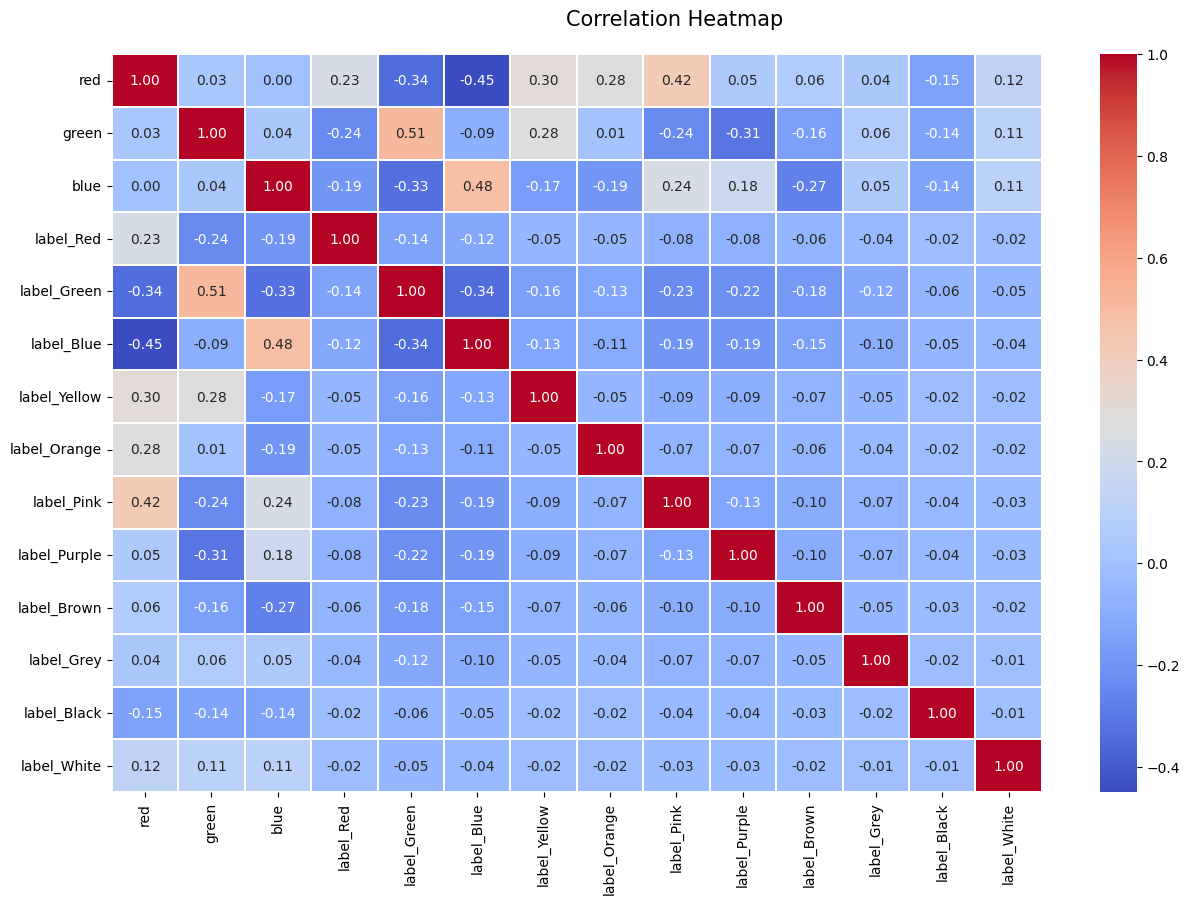

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

In [ ]:
train_df= df.sample(frac=0.7, random_state=20)
test_df=df.drop(train_df.index)
train_df.shape, test_df.shape

((3536, 14), (1516, 14))

In [ ]:
train_labels = pd.DataFrame([train_df.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
209,False,True,False,False,False,False,False,False,False,False,False
4376,False,True,False,False,False,False,False,False,False,False,False
2106,False,False,True,False,False,False,False,False,False,False,False
3196,False,False,True,False,False,False,False,False,False,False,False
862,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
224,False,False,False,False,False,False,False,True,False,False,False
4856,False,False,False,False,False,True,False,False,False,False,False
4334,False,False,False,False,False,False,True,False,False,False,False
4312,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
train_df

,red,green,blue
209,148,152,109
4376,109,222,148
2106,57,186,248
3196,60,99,243
862,137,51,240
...,...,...,...
224,178,135,94
4856,193,57,102
4334,151,9,167
4312,196,224,207


In [ ]:
test_labels = pd.DataFrame([test_df.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,False,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False
22,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5041,False,False,False,False,False,False,False,False,False,True,False
5046,False,False,False,False,False,False,False,False,False,True,False
5047,False,False,False,False,False,False,False,False,False,True,False
5048,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
test_df

,red,green,blue
0,20,139,240
2,144,249,131
3,168,25,156
15,10,155,98
22,58,137,127
...,...,...,...
5041,20,20,20
5046,25,25,25
5047,26,26,26
5048,27,27,27


SetUp the layers

In [ ]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_df.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

Compile the model

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [ ]:
history = model.fit(x=train_df, y=train_labels,
                    validation_split=0.2,
                    epochs=6001,
                    batch_size=2048,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)


Epoch: 0, accuracy:0.7907,  loss:0.5109,  val_accuracy:0.8051,  val_loss:0.5325,  
....................................................................................................
Epoch: 100, accuracy:0.7935,  loss:0.5096,  val_accuracy:0.8065,  val_loss:0.5308,  
....................................................................................................
Epoch: 200, accuracy:0.7907,  loss:0.5076,  val_accuracy:0.8121,  val_loss:0.5281,  
....................................................................................................
Epoch: 300, accuracy:0.7928,  loss:0.5078,  val_accuracy:0.8079,  val_loss:0.5299,  
....................................................................................................
Epoch: 400, accuracy:0.7921,  loss:0.5098,  val_accuracy:0.8023,  val_loss:0.5295,  
....................................................................................................
Epoch: 500, accuracy:0.7956,  loss:0.5069,  val_accuracy:0.8065,  val_l

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5996,0.482655,0.804809,0.546427,0.813559,5996
5997,0.481693,0.808345,0.546546,0.814972,5997
5998,0.482794,0.804455,0.541924,0.812147,5998
5999,0.482041,0.802687,0.539693,0.809322,5999
6000,0.482246,0.799151,0.538882,0.812147,6000


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'accuracy [Color]')

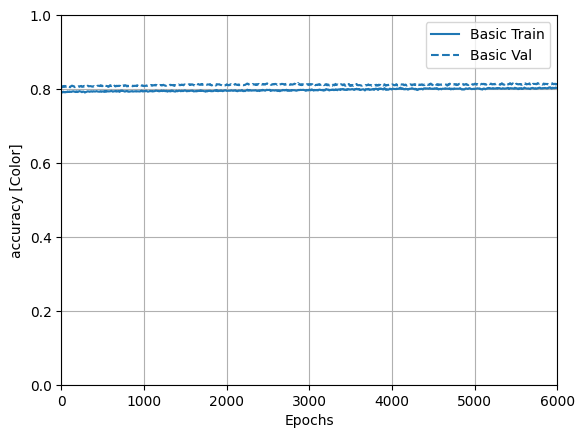

In [ ]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

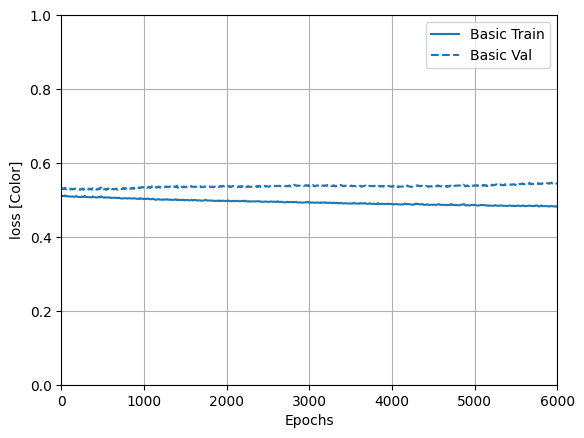

In [ ]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

MAKE PREDICTION

The prediction by the ANN model is an array of 11 numbers.

They represent the model's "confidence" that the RGB color corresponds to each of the 11 different classes of color as follows:

0 for Red
1 for Green
2 for Blue
3 for Yellow
4 for Orange
5 for Pink
6 for Purple
7 for Brown
8 for Grey
9 for Black
10 for White
You can see which out of the 11 labels has the highest confidence value

In [ ]:
train_predictions = model.predict(train_df)
train_predictions


111/111 [==============================] - 1s 3ms/step


array([[-18.09816   ,   0.57152605, -11.4686985 , ...,  -0.5836806 ,
        -30.846043  ,  -6.6557045 ],
       [-23.08212   ,   6.7245684 ,  -3.0497873 , ..., -13.009703  ,
        -19.411726  , -18.045444  ],
       [-15.081783  ,   2.9675329 ,   8.486483  , ..., -29.850716  ,
          6.615116  , -10.777706  ],
       ...,
       [-80.94345   ,   2.1096835 ,  10.100422  , ...,   4.735049  ,
         -1.9942994 , -78.71594   ],
       [-13.1456585 ,  -0.5357035 ,  -5.2969375 , ...,   0.6783323 ,
        -28.533335  ,  -3.0756528 ],
       [-23.901796  ,   4.9556274 , -20.679195  , ...,  -4.7894845 ,
        -42.423965  , -21.895021  ]], dtype=float32)

In [ ]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels


array([1, 1, 2, ..., 6, 1, 1])

In [ ]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels


array([7, 1, 2, ..., 6, 8, 1])

Convert numpy to pandas

In [ ]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,1
1,1
2,2
3,2
4,6
...,...
3531,7
3532,5
3533,6
3534,1


In [ ]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels


,Labels
0,7
1,1
2,2
3,2
4,6
...,...
3531,7
3532,5
3533,6
3534,8


In [ ]:
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])


Test Dataset prediction

In [ ]:
test_predictions = model.predict(test_df)
test_predictions

48/48 [==============================] - 0s 5ms/step


array([[-14.806677  ,  -7.3623705 ,  11.448569  , ..., -40.76097   ,
         -2.0199363 , -12.546908  ],
       [-25.368856  ,   6.037478  , -11.524885  , ...,  -1.7018017 ,
        -14.69861   , -19.319895  ],
       [-54.53964   ,   0.25761852,   6.125182  , ...,   2.4743688 ,
        -17.9071    , -59.456688  ],
       ...,
       [-20.393248  ,   2.8417594 ,   2.435219  , ...,   2.807075  ,
          4.003404  ,  -4.545491  ],
       [-20.338478  ,   2.8422394 ,   2.430248  , ...,   2.763411  ,
          3.8507493 ,  -4.4767847 ],
       [-20.174173  ,   2.8436823 ,   2.4153345 , ...,   2.6324162 ,
          3.392776  ,  -4.2706633 ]], dtype=float32)

In [ ]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1)
actual_encoded_test_labels


array([2, 1, 5, ..., 9, 9, 9])

In [ ]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([2, 1, 5, ..., 9, 9, 9])

In [ ]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

,Labels
0,2
1,1
2,5
3,1
4,1
...,...
1511,9
1512,9
1513,9
1514,9


In [ ]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels


,Labels
0,2
1,1
2,5
3,1
4,2
...,...
1511,9
1512,9
1513,9
1514,9


In [ ]:
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

Evaluate model

In [ ]:
model.evaluate(x=train_df, y=train_labels)

111/111 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.8029


[0.4935586452484131, 0.8028846383094788]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train


array([[130,   0,   0,   0,   8,  23,   0,  11,   0,   0,   0],
       [  0, 924,  15,  21,   0,   1,   0,  17,  13,   3,   0],
       [  0,  84, 642,   0,   0,   0,  42,   1,  10,   5,   0],
       [  0,  23,   0, 149,   9,   0,   0,  30,   1,   0,   0],
       [ 14,   0,   0,  10,  97,   1,   0,  17,   0,   0,   0],
       [ 20,   0,   0,   0,   0, 322,  55,   8,   0,   0,   0],
       [  0,   0,  22,   0,   0,  40, 318,   5,   2,   0,   0],
       [  4,  19,   0,  14,  13,  10,   9, 186,  20,   0,   0],
       [  0,   9,  10,   0,   0,   0,   6,  35,  52,   1,   0],
       [  0,   2,  12,   0,   0,   0,   0,   0,   2,  19,   0],
       [  0,   0,   0,   0,   0,   0,   0,  20,   0,   0,   0]])

In [ ]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.77      0.76      0.76       172
       Green       0.87      0.93      0.90       994
        Blue       0.92      0.82      0.86       784
      Yellow       0.77      0.70      0.73       212
      Orange       0.76      0.70      0.73       139
        Pink       0.81      0.80      0.80       405
      Purple       0.74      0.82      0.78       387
       Brown       0.56      0.68      0.61       275
        Grey       0.52      0.46      0.49       113
       Black       0.68      0.54      0.60        35
       White       0.00      0.00      0.00        20

    accuracy                           0.80      3536
   macro avg       0.67      0.65      0.66      3536
weighted avg       0.80      0.80      0.80      3536



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Evaluating for test dataset

In [ ]:
model.evaluate(x=test_df, y=test_labels)

48/48 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.7823


[0.6195799112319946, 0.7823218703269958]

In [ ]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

array([[ 45,   0,   0,   0,   2,  14,   0,   3,   0,   0,   0],
       [  0, 428,  14,   8,   0,   0,   0,  11,   2,   0,   0],
       [  0,  43, 256,   0,   0,   0,  15,   1,   6,   2,   0],
       [  0,  11,   0,  46,   3,   0,   0,  13,   0,   0,   0],
       [ 10,   0,   0,   6,  40,   0,   0,  10,   0,   0,   0],
       [  7,   0,   0,   0,   0, 138,  23,   5,   1,   0,   0],
       [  0,   0,  17,   0,   0,  14, 133,   2,   0,   0,   0],
       [  1,   9,   0,   5,   7,   2,   5,  62,  10,   0,   0],
       [  0,   7,  11,   0,   0,   0,   1,  17,  24,   1,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,   0,  14,   0],
       [  0,   0,   0,   0,   0,   1,   0,   7,   1,   0,   0]])

In [ ]:
#Libraries to visualize model
!pip install ann_visualizer
!pip install graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=954b771001d0d6cc7e1c92fca94dd881b338f558ea50e0af8a9fa6159501a367
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz;
model.load_weights("colormodel_trained_90.h5")
ann_viz(model, title="Artificial Neural network - RGB Color Classifier Model Visualization")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'colormodel_trained_90.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)